# Data Exploration and Analysis

This notebook contains the initial data exploration and analysis for the Business Analytics project.

## Steps:
1. Load and inspect the data
2. Perform exploratory data analysis (EDA)
3. Data cleaning and preprocessing
4. Statistical analysis
5. Visualizations
6. Generate insights and recommendations


In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add src to path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

# Import custom utilities
from src.utils import load_data, get_data_path, plot_distribution, plot_correlation_matrix

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Load Data


In [5]:
# Load the dataset
data_path = get_data_path('data.csv', subfolder='raw')
df = load_data(data_path)

print(f"Data shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}): {list(df.columns)}")
print(f"\nDataset loaded successfully!")


Data shape: (1470, 44)

Columns (44): ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'PerformanceIndex', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyAchievement', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'HowToEmploy', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']

Dataset loaded successfully!


## 2. Initial Data Inspection


In [ ]:
# Display first few rows to check
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,PerformanceIndex,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Y,16,1,1,40,0,8,0,1,6,4,0,5,agent_B,0,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,Y,7,4,4,40,1,10,3,3,10,7,1,7,intern,3431,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Y,32,3,2,40,0,7,3,3,0,0,0,0,intern,0,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Y,28,1,3,40,0,8,3,3,8,7,3,0,intern,0,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,Y,10,2,4,40,1,6,3,3,2,2,2,2,agent_C,0,2,3029,3,2,0,0,0,0,3,2023


In [7]:
# Data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  PerformanceIndex          1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [8]:
# Statistical summary
df.describe()


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,PerformanceIndex,JobInvolvement,JobLevel,JobSatisfaction,MonthlyAchievement,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.895238,9.236735,2.910204,1.0,1022.185034,2.721769,65.891156,2.729932,2.074830,2.728571,14313.103401,2.682993,15.330612,2.533333,2.712245,40.0,0.793878,11.253741,2.799320,2.761224,7.008163,4.231293,2.196599,4.123810,1142.874150,2.824490,6922.257143,2.499320,2.500000,0.596599,0.293878,0.252381,0.551020,2.104082,2023.200000
std,9.151321,8.129551,1.025259,0.0,602.769132,1.093082,20.329428,0.711561,1.109943,1.102846,7117.786044,2.498505,12.518178,0.991409,1.081209,0.0,0.852077,7.754327,1.289271,0.706476,6.110504,3.590639,3.214817,3.569734,1506.257621,1.229521,1977.100821,0.883052,1.131124,0.490747,0.455692,0.434526,0.497559,0.949750,0.400136
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,0.000000,1.000000,1.000000,40.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1329.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
25%,30.000000,2.000000,2.000000,1.0,486.250000,2.000000,48.000000,2.000000,1.000000,2.000000,8047.000000,1.000000,5.000000,2.000000,2.000000,40.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.000000,5542.250000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
50%,36.000000,7.000000,3.000000,1.0,1018.500000,3.000000,66.000000,3.000000,2.000000,3.000000,14235.500000,2.000000,13.000000,3.000000,3.000000,40.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000,6814.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2023.000000
75%,43.000000,14.000000,4.000000,1.0,1554.750000,4.000000,83.750000,3.000000,3.000000,4.000000,20461.500000,4.000000,24.000000,3.000000,4.000000,40.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,2394.250000,4.000000,8264.750000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2023.000000
max,60.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,61.000000,4.000000,4.000000,40.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,6047.000000,5.000000,12612.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2024.000000


In [ ]:
# Check for missing values for imputation
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values:")
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


✓ No missing values found in the dataset!

Duplicate rows: 0


## 3. Exploratory Data Analysis


In [10]:
# Identify column types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID columns and constant columns
id_cols = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
numerical_cols = [col for col in numerical_cols if col not in id_cols]

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")

# Check for constant columns
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)
if constant_cols:
    print(f"\nConstant columns (same value for all rows): {constant_cols}")


Numerical columns (32): ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'PerformanceIndex', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyAchievement', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']

Categorical columns (9): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'HowToEmploy']

Constant columns (same value for all rows): ['EmployeeCount', 'Over18', 'StandardHours']


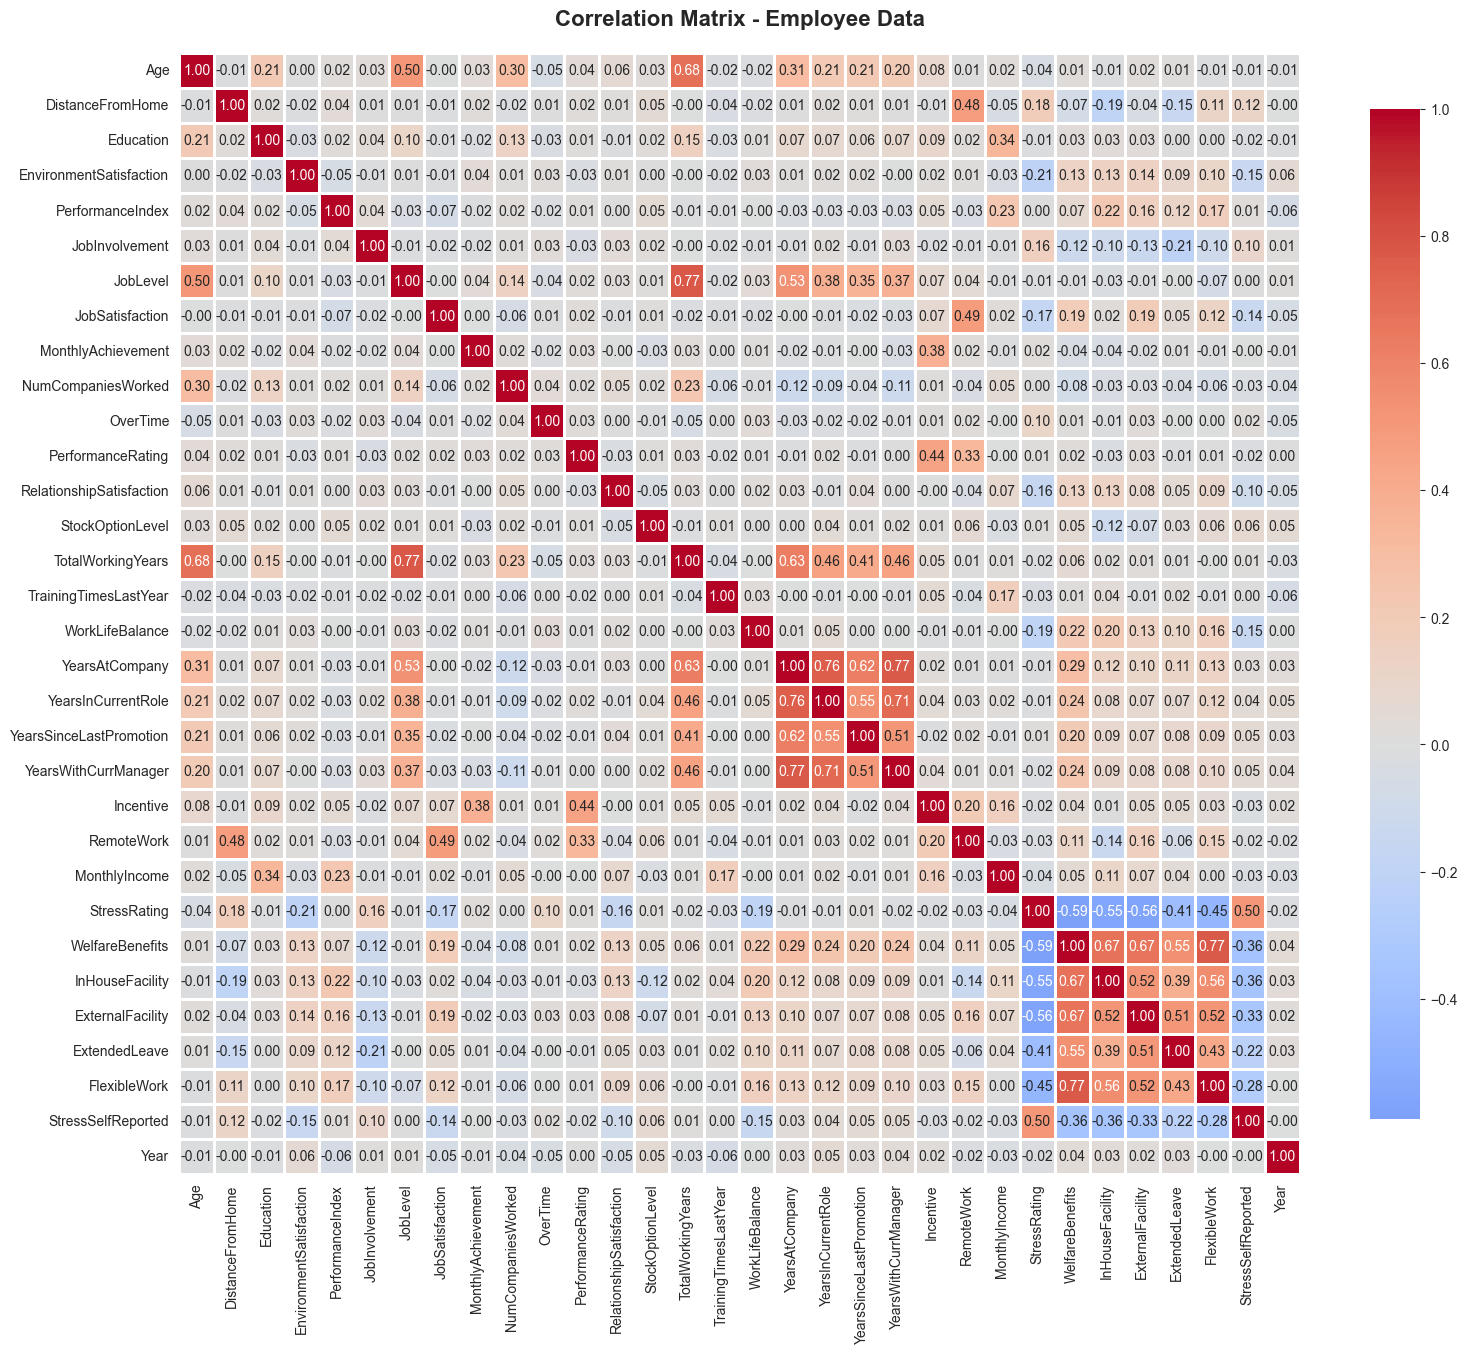


Highly correlated feature pairs (|r| > 0.7):
  JobLevel <-> TotalWorkingYears: 0.771
  YearsAtCompany <-> YearsInCurrentRole: 0.756
  YearsAtCompany <-> YearsWithCurrManager: 0.768
  YearsInCurrentRole <-> YearsWithCurrManager: 0.713
  WelfareBenefits <-> FlexibleWork: 0.766


In [11]:
# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    # Select only numerical columns for correlation
    numerical_df = df[numerical_cols]
    fig = plot_correlation_matrix(numerical_df, figsize=(16, 14))
    plt.title('Correlation Matrix - Employee Data', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated features
    corr_matrix = numerical_df.corr().abs()
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > 0.7:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print("\nHighly correlated feature pairs (|r| > 0.7):")
        for pair in high_corr_pairs:
            print(f"  {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")


## 4. Data Cleaning


In [12]:
# Data Cleaning Steps
df_clean = df.copy()

print("Data Cleaning Summary:")
print(f"Original shape: {df.shape}")

# 1. Remove constant columns (if any)
constant_cols_to_remove = ['EmployeeCount', 'Over18', 'StandardHours']
df_clean = df_clean.drop(columns=[col for col in constant_cols_to_remove if col in df_clean.columns])
print(f"After removing constant columns: {df_clean.shape}")

# 2. Check for duplicates
duplicates_before = df_clean.duplicated().sum()
if duplicates_before > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {duplicates_before} duplicate rows")

# 3. Data type corrections (if needed)
# Convert categorical columns to proper types
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus', 'HowToEmploy']
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

print(f"Final cleaned shape: {df_clean.shape}")
print("\n✓ Data cleaning completed!")


Data Cleaning Summary:
Original shape: (1470, 44)
After removing constant columns: (1470, 41)
Final cleaned shape: (1470, 41)

✓ Data cleaning completed!


## 5. Analysis and Insights


In [13]:
# Initial Insights and Summary Statistics

# Target variable analysis
if 'Attrition' in df_clean.columns:
    attrition_counts = df_clean['Attrition'].value_counts()
    attrition_pct = df_clean['Attrition'].value_counts(normalize=True) * 100
    
    print("=== ATTRITION ANALYSIS ===")
    print(f"\nAttrition Distribution:")
    for val, count in attrition_counts.items():
        print(f"  {val}: {count} ({attrition_pct[val]:.2f}%)")
    
    # Key statistics by Attrition
    print("\n=== KEY METRICS BY ATTRITION STATUS ===")
    key_metrics = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 
                   'WorkLifeBalance', 'StressRating', 'PerformanceIndex']
    
    for metric in key_metrics:
        if metric in df_clean.columns:
            print(f"\n{metric}:")
            print(df_clean.groupby('Attrition')[metric].agg(['mean', 'median', 'std']))

# Department and Job Role distribution
print("\n=== DEPARTMENT DISTRIBUTION ===")
if 'Department' in df_clean.columns:
    print(df_clean['Department'].value_counts())

print("\n=== JOB ROLE DISTRIBUTION ===")
if 'JobRole' in df_clean.columns:
    print(df_clean['JobRole'].value_counts())


=== ATTRITION ANALYSIS ===

Attrition Distribution:
  No: 1232 (83.81%)
  Yes: 238 (16.19%)

=== KEY METRICS BY ATTRITION STATUS ===

Age:
                mean  median       std
Attrition                             
No         37.533279    36.0  8.910451
Yes        33.592437    32.0  9.676076

MonthlyIncome:
                  mean  median          std
Attrition                                  
No         7012.964286  6956.0  1950.358799
Yes        6452.714286  6299.0  2051.042648

YearsAtCompany:
               mean  median       std
Attrition                            
No         7.392045     6.0  6.120350
Yes        5.021008     3.0  5.669109

JobSatisfaction:
               mean  median       std
Attrition                            
No         2.771916     3.0  1.099039
Yes        2.504202     3.0  1.097553

WorkLifeBalance:
               mean  median       std
Attrition                            
No         2.778409     3.0  0.686711
Yes        2.672269     3.0  0.796715

Str

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20628\4135148590.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('Attrition')[metric].agg(['mean', 'median', 'std']))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20628\4135148590.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('Attrition')[metric].agg(['mean', 'median', 'std']))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20628\4135148590.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

## 6. Save Processed Data


In [14]:
# Save cleaned/processed data
from src.utils import save_processed_data
save_processed_data(df_clean, 'cleaned_data.csv')

print("✓ Cleaned data saved to data/processed/cleaned_data.csv")


Data saved to: C:\Users\ADMIN\Documents\GitHub\Business-Analytics\data\processed\cleaned_data.csv
✓ Cleaned data saved to data/processed/cleaned_data.csv
